## 欠損値の処理

In [3]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

In [4]:
%autoreload

In [5]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2022.csv'), index_col=0,  sep="\t")

In [6]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [7]:
df.isnull().sum()

race_id                        0
horse_id                       0
jockey_id                      0
trainer_id                     0
owner_id                       0
rank                           0
frame                          0
number                         0
sex                            0
age                            0
impost                         0
win_odds                       0
popularity                     0
weight                         0
weight_diff                    0
date                           0
race_type                      0
around                      1665
course_len                   349
weather                      335
ground_state                 335
race_class                  7389
place                       2381
reference_date              4713
rank_mean                   4713
rank_min                    4713
rank_max                    4713
rank_std                    9015
n_horses_mean               4713
rank_diff_mean              4717
rank_diff_

In [8]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

## モデルの学習 & 予測

In [9]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [10]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

In [28]:
%autoreload

In [29]:
p = predict.RFModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.55, stochastic_variation=False)

c:\Users\SV8\m\p\keiba\modules\predict.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Confusion Matrix:
 [[6612  647]
 [1255  854]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      7259
           1       0.57      0.40      0.47      2109

    accuracy                           0.80      9368
   macro avg       0.70      0.66      0.67      9368
weighted avg       0.78      0.80      0.78      9368



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [13]:
df_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_2023.csv'), index_col=0,  sep="\t")
df_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'owner_id', 'rank',
       'frame', 'number', 'sex', 'age', 'impost', 'win_odds', 'popularity',
       'weight', 'weight_diff', 'date', 'race_type', 'around', 'course_len',
       'weather', 'ground_state', 'race_class', 'place', 'reference_date',
       'rank_mean', 'rank_min', 'rank_max', 'rank_std', 'n_horses_mean',
       'rank_diff_mean', 'rank_diff_std', '3_furlongs_mean', '3_furlongs_std',
       'prize_mean', 'prize_sum', 'course_len_mean', 'course_len_min',
       'course_len_max', 'weather_mode', 'race_type_mode', 'ground_state_mode',
       'consistency', 'time_per_course_len', 'course_len_mode',
       'same_course_len_avg_rank', 'days_since_last_race',
       'race_interval_category', 'parent_0', 'parent_1', 'parent_2',
       'parent_3', 'parent_4', 'parent_5'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
df_23 = scaler.fit_transform(df_23)

In [17]:
pred_df = p.predict_target(df_23)
pred_df

c:\Users\SV8\m\p\keiba\modules\predict.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,parent_2,parent_3,parent_4,parent_5,horse_id_encoded,trainer_id_encoded,jockey_id_encoded,owner_id_encoded,predicted_proba,predicted_target
0,202301010101,2021100648,1095,1128,281008,5.0,1,1,1,2,...,189.0,436.0,584.0,1852.0,5,237,535,42,0.44,0
1,202301010101,2021100159,1157,1186,170800,6.0,2,2,0,2,...,156.0,462.0,780.0,6337.0,2,253,870,366,0.10,0
2,202301010101,2021100265,1197,1192,320803,7.0,3,3,1,2,...,189.0,334.0,745.0,6482.0,4,142,800,24,0.38,0
3,202301010101,2021105553,5339,1160,680031,4.0,4,4,1,2,...,210.0,406.0,741.0,5141.0,6,269,665,13,0.53,0
4,202301010101,2021101429,1170,1026,425031,1.0,5,5,0,2,...,165.0,329.0,780.0,4573.0,4,239,793,18,0.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1.0,6,8,1,4,...,189.0,301.0,618.0,1738.0,10,327,595,79,0.62,1
47269,202310030812,2020103754,1116,1104,651031,6.0,7,9,0,3,...,81.0,337.0,384.0,1551.0,8,215,697,32,0.19,0
47270,202310030812,2020100400,1193,1092,180800,4.0,7,10,1,3,...,176.0,288.0,780.0,6282.0,7,328,483,428,0.25,0
47271,202310030812,2020103663,732,1092,226800,2.0,8,11,2,3,...,176.0,288.0,185.0,1206.0,9,328,826,944,0.58,1


In [26]:
pred_df['predicted_target'].value_counts()

predicted_target
0    39200
1     8073
Name: count, dtype: int64

c:\Users\SV8\m\p\keiba\modules\predict.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

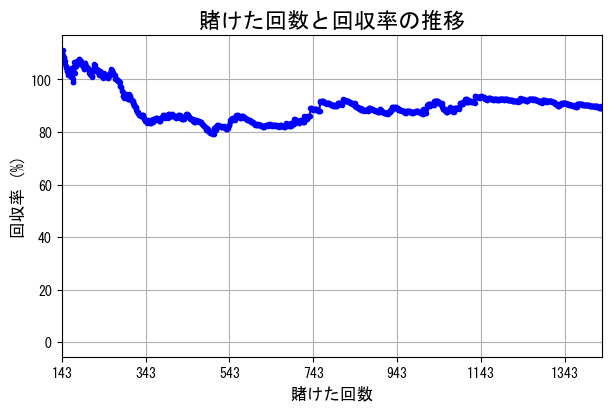

総払い戻し金額: 355680.0円
賭けた回数: 1431回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010105,0.0,100,100,0.0,0.000000
1,202301010106,0.0,100,200,0.0,0.000000
2,202301010204,0.0,100,300,0.0,0.000000
3,202301010205,0.0,400,700,0.0,0.000000
4,202301010301,0.0,100,800,0.0,0.000000
...,...,...,...,...,...,...
1426,202310030605,0.0,100,393500,351230.0,0.892579
1427,202310030702,0.0,100,393600,351230.0,0.892353
1428,202310030802,0.0,100,393700,351230.0,0.892126
1429,202310030805,2860.0,1000,394700,354090.0,0.897112


In [27]:
total_returns = p.calc_returns_rate(df_23)
total_returns

In [307]:
%autoreload

In [320]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, stochastic_variation=False)

c:\Users\SV8\m\p\keiba\modules\predict.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Confusion Matrix:
 [[5606 1653]
 [1265  844]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      7259
           1       0.34      0.40      0.37      2109

    accuracy                           0.69      9368
   macro avg       0.58      0.59      0.58      9368
weighted avg       0.71      0.69      0.70      9368



In [321]:
pred_df = nn.predict_target(df_23)
pred_df

c:\Users\SV8\m\p\keiba\modules\predict.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,frame,number,sex,age,...,parent_2,parent_3,parent_4,parent_5,horse_id_encoded,trainer_id_encoded,jockey_id_encoded,owner_id_encoded,predicted_proba,predicted_target
0,202301010101,2021100648,1095,1128,281008,5.0,1,1,1,2,...,189.0,436.0,584.0,1852.0,5,237,535,42,0.438822,0
1,202301010101,2021100159,1157,1186,170800,6.0,2,2,0,2,...,156.0,462.0,780.0,6337.0,2,253,870,366,0.453539,0
2,202301010101,2021100265,1197,1192,320803,7.0,3,3,1,2,...,189.0,334.0,745.0,6482.0,4,142,800,24,0.283590,0
3,202301010101,2021105553,5339,1160,680031,4.0,4,4,1,2,...,210.0,406.0,741.0,5141.0,6,269,665,13,0.406384,0
4,202301010101,2021101429,1170,1026,425031,1.0,5,5,0,2,...,165.0,329.0,780.0,4573.0,4,239,793,18,0.798296,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47268,202310030812,2019102542,1208,1161,17803,1.0,6,8,1,4,...,189.0,301.0,618.0,1738.0,10,327,595,79,0.549553,0
47269,202310030812,2020103754,1116,1104,651031,6.0,7,9,0,3,...,81.0,337.0,384.0,1551.0,8,215,697,32,0.748218,1
47270,202310030812,2020100400,1193,1092,180800,4.0,7,10,1,3,...,176.0,288.0,780.0,6282.0,7,328,483,428,0.628878,1
47271,202310030812,2020103663,732,1092,226800,2.0,8,11,2,3,...,176.0,288.0,185.0,1206.0,9,328,826,944,0.940100,1


In [322]:
pred_df['predicted_target'].value_counts()

predicted_target
0    34420
1    12853
Name: count, dtype: int64

c:\Users\SV8\m\p\keiba\modules\predict.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
c:\Users\SV8\m\p\keiba\modules\predict.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

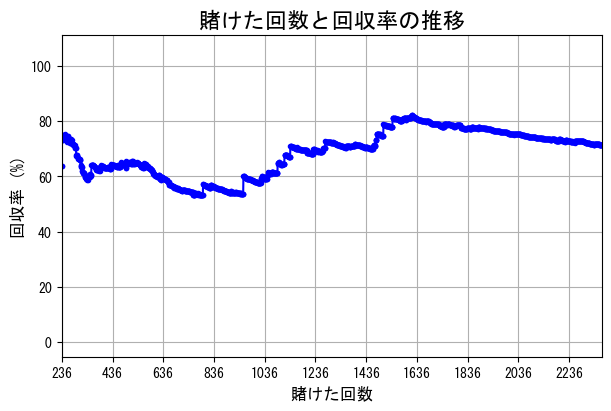

総払い戻し金額: 2615380.0円
賭けた回数: 2364回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate
0,202301010103,0.0,2000,2000,0.0,0.000000
1,202301010104,0.0,400,2400,0.0,0.000000
2,202301010106,0.0,100,2500,0.0,0.000000
3,202301010107,0.0,2000,4500,0.0,0.000000
4,202301010108,0.0,3500,8000,0.0,0.000000
...,...,...,...,...,...,...
2359,202310030807,0.0,5600,3662000,2612380.0,0.713375
2360,202310030808,0.0,100,3662100,2612380.0,0.713356
2361,202310030810,0.0,2000,3664100,2612380.0,0.712966
2362,202310030811,3000.0,1000,3665100,2615380.0,0.713590


In [323]:
total_returns = nn.calc_returns_rate(df_23)
total_returns